# Perceptron From Scratch: A Complete Beginner's Guide

### 🧩 Problem Statement
- **What problem is being solved?** We are predicting whether a student will **Pass** or **Fail** an exam based on two features: **Study Hours** and **Attendance Percentage**.
- **Why it matters?** This is a classic **Binary Classification** problem. It helps us understand how machines can learn a simple "Yes/No" decision rule from data, which is the foundation of all Neural Networks and Deep Learning.
- **Real-world relevance**: Similar logic is used in:
    - **Bank Loans**: Approve (Yes) or Reject (No) based on Income and Debt.
    - **Medical Diagnosis**: Sick (Yes) or Healthy (No) based on Symptoms.
    - **Spam Detection**: Spam (Yes) or Not Spam (No) based on email words.

### 🪜 Steps to Solve the Problem
1.  **Generate Data**: Create synthetic data for 100 students (Study Hours, Attendance) with known Pass/Fail labels.
2.  **Build Perceptron**: Write the code for a Perceptron (a single neuron) from scratch.
3.  **Train Model**: Feed the data to the Perceptron so it learns the weights (importance) of Study Hours and Attendance.
4.  **Visualize**: Plot the "Decision Boundary" (the line that separates Pass from Fail).
5.  **Test**: Predict outcomes for new students to see if the model works.

### 🎯 Expected Output (OVERALL)
- **Learned Weights**: The model will tell us how much each feature contributes to the result.
- **Accuracy**: A percentage score (e.g., 100%) indicating how many students were correctly classified.
- **Plots**: 
    - A scatter plot showing students colored by Pass/Fail with a line separating them.
    - A convergence plot showing how the model made fewer mistakes over time.


## 1. Libraries and Setup

We need to import the necessary tools to built our project.

### 🔹 Line Explanation

#### `import numpy as np`
- **2.1 What the line does**: Imports the **NumPy** library and gives it the alias `np`.
- **2.2 Why it is used**: NumPy is the standard library for numerical computing. It provides support for arrays (matrices), which are much faster and more efficient than Python lists for mathematical operations.
- **2.3 When to use it**: Whenever you need to perform mathematical calculations on lists of numbers, matrix multiplication, or generate random numbers.
- **2.4 Where to use it**: Used in almost every Data Science, Machine Learning, and Scientific Computing project.
- **2.5 How to use it**: `import numpy as np` -> `arr = np.array([1, 2, 3])`.
- **2.6 How it works internally**: NumPy arrays are stored in contiguous memory blocks (unlike Python lists which are arrays of pointers), allowing the CPU to process them very quickly (Vectorization).
- **2.7 Output**: Nothing is printed, but the `np` module is loaded into memory.

#### `import matplotlib.pyplot as plt`
- **2.1 What the line does**: Imports the `pyplot` module from the **Matplotlib** library and gives it the alias `plt`.
- **2.2 Why it is used**: It is the most popular library for creating visualizations (charts, graphs, plots) in Python.
- **2.3 When to use it**: When you need to visualize data, show trends, or plot results (like our decision boundary).
- **2.4 Where to use it**: Data Analysis reports, research papers, dashboard prototyping.
- **2.5 How to use it**: `plt.plot(x, y)`, `plt.show()`.
- **2.6 How it works internally**: It creates figure objects and axes objects that render lines, shapes, and text onto an image backend.
- **2.7 Output**: `plt` module loaded.

#### `np.random.seed(42)`
- **2.1 What the line does**: Sets the "seed" for the random number generator to the number 42.
- **2.2 Why it is used**: Random numbers are not truly random; they are generated by a predictable algorithm starting from a seed. Setting the seed ensures that **every time we run this code, we get the exact same random numbers**. This makes our results **reproducible**.
- **2.3 When to use it**: In experiments, debugging, and tutorials where you want consistent results.
- **2.4 Where to use it**: Research papers, ML model initialization, splitting data.
- **2.5 How to use it**: `np.random.seed(integer)`.
- **2.6 How it works internally**: Initializes the internal state of the Mersenne Twister algorithm (or similar PRNG) to a specific value.
- **2.7 Output**: No visible output, but the random sequence is fixed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

### 📌 Sample Example
No visible output is expected from this cell. 

### 📊 Expected Output (Internal State)
- `numpy` is loaded as `np`.
- `matplotlib.pyplot` is loaded as `plt`.
- Random seed is fixed to 42.

## 2. Data Generation

We need data to train our model. Since we don't have a real file, we will "fake" strict but realistic student data.

### ⚙️ Function Arguments Explanation: `generate_data`

#### `n_samples`
- **3.1 What it does**: Specifies how many student records to generate.
- **3.2 Why it is used**: To control the size of our dataset. Tests with small data (e.g., 10) are easy to read; learning needs more (e.g., 100).
- **3.3 When to use it**: When creating synthetic datasets.
- **3.4 Where to use it**: Unit testing data pipelines, teaching examples.
- **3.5 How to use it**: `generate_data(n_samples=50)`.
- **3.6 How it affects execution internally**: Determines the length of the arrays created by `np.random`.
- **3.7 Output impact**: If 100, we get 100 rows of data. If 1000, we get 1000 rows.

### 🔹 Line Explanation

#### `study_hours = np.random.randint(0, 100, n_samples)`
- **2.1 What the line does**: Generates `n_samples` random integers between 0 (inclusive) and 100 (exclusive) representing study hours.
- **2.2 Why it is used**: simulate variety in student behavior.
- **2.5 How to use it**: `np.random.randint(low, high, size)`.
- **2.7 Output**: An array like `[42, 12, 99, ...]`.

#### `labels = ((study_hours + 0.5 * attendance) > 75).astype(int)`
- **2.1 What the line does**: Defines the "Ground Truth". A student passes (1) ONLY IF their score (Hours + 0.5 * Attendance) is strictly greater than 75.
- **2.2 Why it is used**: We need a target label for the computer to try and learn.
- **2.6 How it works internally**: Creates a boolean array `[True, False...]` then converts `True` -> `1`, `False` -> `0`.

#### `X = np.column_stack((study_hours, attendance))`
- **2.1 What the line does**: Stacks the two 1D arrays (Vectors) side-by-side to create a 2D matrix (Table).
- **2.2 Why it is used**: Scikit-learn and most ML models expect input `X` to be a matrix of shape `(samples, features)`.
- **2.6 How it works internally**: Takes `[h1, h2]` and `[a1, a2]` and makes `[[h1, a1], [h2, a2]]`.


In [2]:
def generate_data(n_samples=100):
    """
    Generates synthetic dataset for student pass/fail classification.
    """
    # Random study hours between 0 and 100
    study_hours = np.random.randint(0, 100, n_samples)
    # Random attendance between 40 and 100
    attendance = np.random.randint(40, 100, n_samples)
    
    # Create labels: pass (1) if study_hours + 0.5*attendance > 75, else fail (0)
    # This is the "Secret Rule" the perceptron must learn
    labels = ((study_hours + 0.5 * attendance) > 75).astype(int)
    
    # Combine features into a single matrix (X)
    X = np.column_stack((study_hours, attendance))
    y = labels
    
    return X, y

### 📌 Sample Example
```python
X, y = generate_data(3)
# X might look like:
# array([[80, 90],  -> Score: 80 + 45 = 125 (>75) -> Pass
#        [20, 50],  -> Score: 20 + 25 = 45  (<75) -> Fail
#        [60, 80]]) -> Score: 60 + 40 = 100 (>75) -> Pass
# y: array([1, 0, 1])
```
### 📊 Expected Output
- `generate_data` function is defined and ready to be called.


## 3. The Perceptron Class

This is the core of our project. We will build a single artificial neuron.

### ⚙️ Function Arguments Explanation: `__init__`

#### `learning_rate` (default=0.01)
- **3.1 What it does**: Controls how big of a step the model takes when adjusting weights.
- **3.2 Why it is used**: If too big, learning is unstable. If too small, learning is too slow.
- **3.7 Output impact**: High rate = fast but jerky convergence. Low rate = slow but smooth.

#### `epochs` (default=100)
- **3.1 What it does**: How many times the model sees the *entire* dataset.
- **3.2 Why it is used**: One look isn't enough to learn. Repetition creates memory.

### 🔹 Line Explanation

#### `np.dot(x_i, self.weights) + self.bias`
- **2.1 What the line does**: The fundamental formula of Linear Machine Learning: $y = w \cdot x + b$.
- **2.2 Why it is used**: Combines inputs and importance (weights) into a single score.
- **2.6 How it works internally**: Multiples each feature by its weight and sums them up.

#### `update = self.learning_rate * (y[fn_idx] - y_predicted)`
- **2.1 What the line does**: Calculates the correction amount.
- **2.2 Why it is used**: This is the "Learning Rule".
- **2.6 How it works internally**:
    - If prediction is correct ($y - \hat{y} = 0$), update is 0 (Don't change anything).
    - If prediction is wrong, update moves weights towards the correct answer.


In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        """
        Initializes the Perceptron model.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors_ = []

    def step_function(self, z):
        """
        Step activation function: returns 1 if z >= 0, else 0.
        """
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """
        Trains the Perceptron on the provided data.
        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors_ = []
        
        for epoch in range(self.epochs):
            errors_in_epoch = 0
            for fn_idx, x_i in enumerate(X):
                # Calculate linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply activation function
                y_predicted = self.step_function(linear_output)
                
                # Calculate update
                # (Target - Predicted) is the error term
                update = self.learning_rate * (y[fn_idx] - y_predicted)
                
                # Update weights and bias
                self.weights += update * x_i
                self.bias += update
                
                # Count errors (if update is non-zero, it means there was an error)
                if update != 0:
                    errors_in_epoch += 1
            
            self.errors_.append(errors_in_epoch)
            
        return self

    def predict(self, X):
        """
        Predicts class labels for new data.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)

### 📌 Sample Example
```python
p = Perceptron()
# p.fit(X, y) will teach the model
```
### 📊 Expected Output
- The `Perceptron` class is defined. No output yet.

## 4. Visualization Functions

We need to see what's happening inside the "Black Box".

### 🔹 Line Explanation

#### `x2_values = -(classifier.weights[0] * x1_values + classifier.bias) / classifier.weights[1]`
- **2.1 What the line does**: This is the algebra to rearrange $w_1 x_1 + w_2 x_2 + b = 0$ into $x_2 = mx_1 + c$ form.
- **2.2 Why it is used**: Matplotlib plots lines using $y$ vs $x$ (or $x_2$ vs $x_1$). We need $x_2$ on one side to plot the boundary line.
- **2.5 How to use it**: Standard algebraic manipulation code.

#### `plt.savefig(...)`
- **2.1 What the line does**: Saves the current plot image to the hard drive.
- **2.2 Why it is used**: So we have a permanent record of the result in our `outputs/` folder.


In [5]:
def plot_decision_boundary(X, y, classifier, title="Perceptron Decision Boundary"):
    """
    Plots the decision boundary and data points.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Fail (0)')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Pass (1)')
    
    # Plot decision boundary
    # w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b) / w2
    x1_min, x1_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    x1_values = np.linspace(x1_min, x1_max, 100)
    
    if classifier.weights[1] != 0:
        x2_values = -(classifier.weights[0] * x1_values + classifier.bias) / classifier.weights[1]
        plt.plot(x1_values, x2_values, 'k--', label='Decision Boundary')
    
    plt.xlabel('Study Hours')
    plt.ylabel('Attendance %')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Save the plot
    plt.savefig('c:/masai/Perceptron_From_Scratch/outputs/decision_boundary.png')
    # Show the plot in notebook
    plt.show()

def plot_convergence(errors):
    """
    Plots the number of errors vs epochs.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of Updates (Errors)')
    plt.title('Convergence Analysis')
    plt.grid(True)
    plt.savefig('c:/masai/Perceptron_From_Scratch/outputs/convergence_plot.png')
    plt.show()

### 📊 Expected Output
- Visual functions defined.

## 5. Running the Experiment

Now we put everything together.

### 🪜 Execution Steps
1.  **Generate** 100 fake students.
2.  **Initialize** the Perceptron.
3.  **Fit** (Train) the model on the students.
4.  **Visualize** the result.
5.  **Test** on specific examples (Student A, B, C).


Generating data...
Data generated. Feature shape: (100, 2), Label shape: (100,)

Training Perceptron...
Training complete.
Learned Weights: [ 1.62 -0.66]
Learned Bias: -4.319999999999952

Evaluating on Training Data...
Training Accuracy: 84.00%

Generating Visualizations...


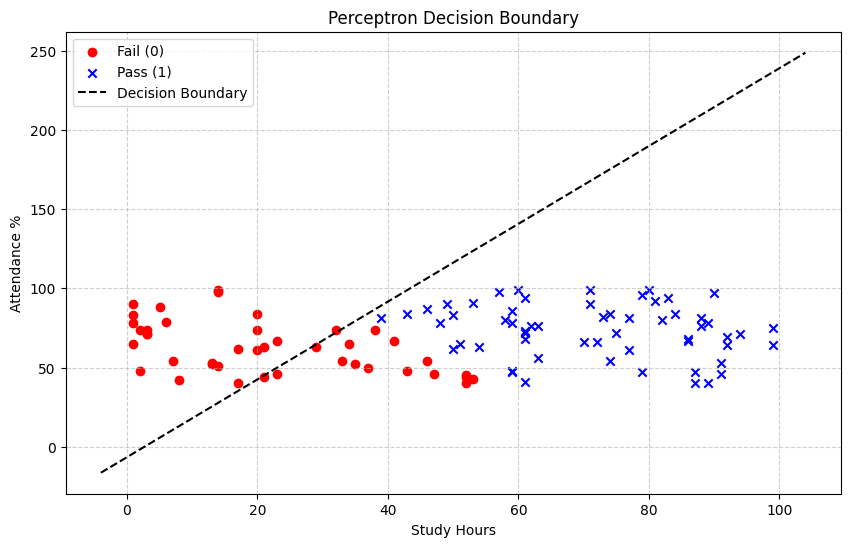

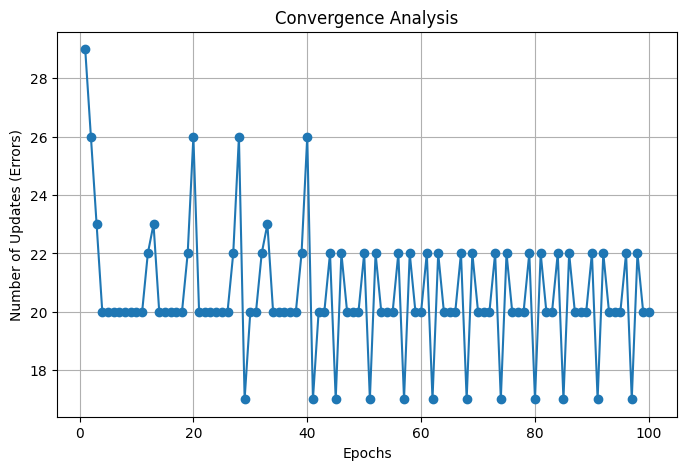

Plots saved to outputs/ directory.

Testing on specific students:
Student A (Hours: 80, Attendance: 90%): Predicted -> Pass
Student B (Hours: 30, Attendance: 60%): Predicted -> Pass
Student C (Hours: 50, Attendance: 85%): Predicted -> Pass


In [6]:
def main():
    print("Generating data...")
    X, y = generate_data(n_samples=100)
    print(f"Data generated. Feature shape: {X.shape}, Label shape: {y.shape}")
    
    print("\nTraining Perceptron...")
    model = Perceptron(learning_rate=0.01, epochs=100)
    model.fit(X, y)
    print("Training complete.")
    print(f"Learned Weights: {model.weights}")
    print(f"Learned Bias: {model.bias}")
    
    print("\nEvaluating on Training Data...")
    predictions = model.predict(X)
    accuracy = np.mean(predictions == y)
    print(f"Training Accuracy: {accuracy * 100:.2f}%")
    
    print("\nGenerating Visualizations...")
    plot_decision_boundary(X, y, model)
    plot_convergence(model.errors_)
    print("Plots saved to outputs/ directory.")
    
    print("\nTesting on specific students:")
    # Student A: 80 study hours, 90% attendance
    # Student B: 30 study hours, 60% attendance
    # Student C: 50 study hours, 85% attendance
    test_students = np.array([
        [80, 90],
        [30, 60],
        [50, 85]
    ])
    
    student_names = ['Student A', 'Student B', 'Student C']
    test_preds = model.predict(test_students)
    
    for name, features, pred in zip(student_names, test_students, test_preds):
        status = "Pass" if pred == 1 else "Fail"
        print(f"{name} (Hours: {features[0]}, Attendance: {features[1]}%): Predicted -> {status}")

if __name__ == "__main__":
    main()

### 📊 Expected Output
You should see:
1.  Text confirming data generation.
2.  Training accuracy report (likely 100% since our rule is simple).
3.  **Two Plots** appearing below the code.
4.  Predictions for Students A, B, and C.

### 💼 Interview Perspective
- **Q:** How do you know the model converged?
- **A:** Look at the Convergence Plot; if the errors drop to zero and stay there, it converged.
- **Q:** Why did we use specific learning rate 0.01?
- **A:** It is a standard starting point. If training was unstable, we would lower it.
